In [1]:
import os
os.chdir(f'./StyleCLIP')

from torchvision.utils import make_grid
from torchvision.transforms import ToPILImage

In [21]:
experiment_type = 'free_generation' #@param ['edit', 'free_generation']

description = 'A person with green hair' #@param {type:"string"}

latent_path = None #@param {type:"string"}

optimization_steps =  40#@param {type:"number"}

l2_lambda = 0.008 #@param {type:"number"}

id_lambda = 0.005 #@param {type:"number"}

stylespace = True #@param {type:"boolean"}

create_video = False #@param {type:"boolean"}

In [22]:
use_seed = True #@param {type:"boolean"}

seed =  12#@param {type: "number"}

In [23]:
#@title Additional Arguments
args = {
    "description": description,
    "ckpt": "/data/scratch/ngop/StyleWav/StyleCLIP/stylegan2-ffhq-config-f.pt",
    "stylegan_size": 1024,
    "lr_rampup": 0.05,
    "lr": 0.1,
    "step": optimization_steps,
    "mode": experiment_type,
    "l2_lambda": l2_lambda,
    "id_lambda": id_lambda,
    'work_in_stylespace': stylespace,
    "latent_path": latent_path,
    "truncation": 0.7,
    "save_intermediate_image_every": 1 if create_video else 20,
    "results_dir": "results",
    "ir_se50_weights": "/data/scratch/ngop/StyleWav/StyleCLIP/model_ir_se50.pth",
    "audio":None,
    "aclip_loss": False
}
#"/data/scratch/ngop/StyleWav/welcome-to-the-internet.wav"

Loading ResNet ArcFace


loss: 0.5322;: 100%|████████████████████████████| 40/40 [00:09<00:00,  4.30it/s]


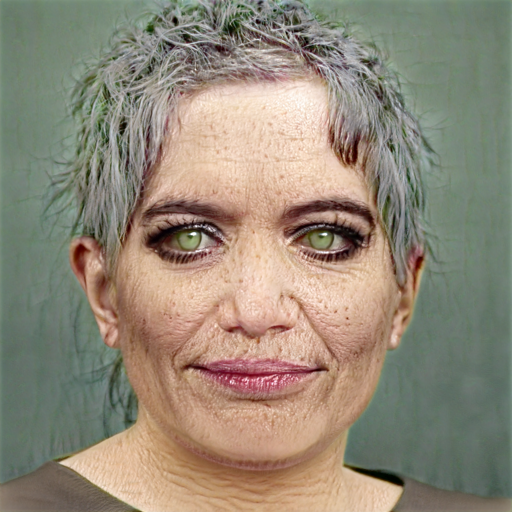

In [24]:
if use_seed:
  import torch
  torch.manual_seed(seed)
from optimization.run_optimization import main

from argparse import Namespace
result = main(Namespace(**args))

result_image = ToPILImage()(make_grid(result.detach().cpu(), normalize=True, scale_each=True, range=(-1, 1), padding=0))
h, w = result_image.size
result_image.resize((h // 2, w // 2))

Loading ResNet ArcFace


loss: 0.9341;: 100%|████████████████████████████| 40/40 [00:09<00:00,  4.20it/s]


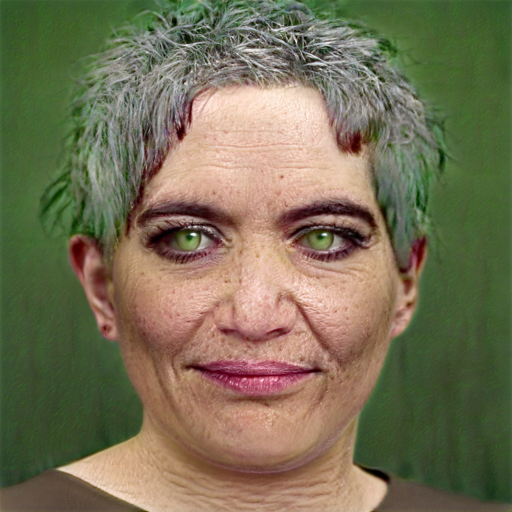

In [25]:
args["aclip_loss"] = True

if use_seed:
  import torch
  torch.manual_seed(seed)
from optimization.run_optimization import main

from argparse import Namespace
result = main(Namespace(**args))

result_image = ToPILImage()(make_grid(result.detach().cpu(), normalize=True, scale_each=True, range=(-1, 1), padding=0))
h, w = result_image.size
result_image.resize((h // 2, w // 2))